In [ ]:
# Re-generate the dataset since the kernel was reset and the file is gone
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
# Define fault types and simulation settings
fault_types = {
    0: "Normal",
    1: "Condenser Fouling",
    2: "Refrigerant Leak",
    3: "Evaporator Fouling",
    4: "Compressor Fault",
    5: "Sensor Drift"
}
n_samples_per_class = 800
n_total = n_samples_per_class * len(fault_types)

np.random.seed(42)
data = []

for fault_code, fault_name in fault_types.items():
    for _ in range(n_samples_per_class):
        # Simulate normal sensor behavior
        temp_evap = np.random.normal(5, 0.5)
        temp_cond = np.random.normal(40, 1.5)
        pressure_suc = np.random.normal(3.5, 0.3)
        pressure_dis = np.random.normal(14, 0.8)
        flow_rate = np.random.normal(120, 10)
        power_input = np.random.normal(55, 5)

        # Fault-specific deviations
        if fault_name == "Condenser Fouling":
            temp_cond += np.random.uniform(3, 7)
            power_input += np.random.uniform(5, 10)
        elif fault_name == "Refrigerant Leak":
            pressure_dis -= np.random.uniform(2, 4)
            power_input -= np.random.uniform(5, 8)
        elif fault_name == "Evaporator Fouling":
            temp_evap += np.random.uniform(2, 4)
            flow_rate -= np.random.uniform(20, 30)
        elif fault_name == "Compressor Fault":
            pressure_suc += np.random.uniform(2, 4)
            pressure_dis += np.random.uniform(3, 5)
            power_input += np.random.uniform(10, 15)
        elif fault_name == "Sensor Drift":
            temp_evap += np.random.uniform(-3, 3)
            pressure_suc += np.random.uniform(-1.5, 1.5)

        data.append([
            temp_evap, temp_cond, pressure_suc, pressure_dis,
            flow_rate, power_input, fault_code, fault_name
        ])



In [4]:
# Create DataFrame
columns = [
    "temp_evap", "temp_cond", "pressure_suc", "pressure_dis",
    "flow_rate", "power_input", "fault_type", "fault_name"
]
df = pd.DataFrame(data, columns=columns)

# Save to CSV
csv_path = "/content/chiller_fault_dataset.csv"
df.to_csv(csv_path, index=False)



In [7]:
# Re-train the Random Forest
encoder = LabelEncoder()
df['fault_type_encoded'] = encoder.fit_transform(df['fault_name'])
X = df.drop(['fault_type', 'fault_name', 'fault_type_encoded'], axis=1)
y = df['fault_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.classes_)

print(f"✅  Test Accuracy: {accuracy:.4f}")

accuracy, report


✅  Test Accuracy: 0.9187


(0.91875,
 '                    precision    recall  f1-score   support\n\n  Compressor Fault       1.00      1.00      1.00       160\n Condenser Fouling       0.90      0.94      0.92       160\nEvaporator Fouling       0.97      0.97      0.97       160\n            Normal       0.80      0.84      0.82       160\n  Refrigerant Leak       0.96      0.94      0.95       160\n      Sensor Drift       0.88      0.81      0.84       160\n\n          accuracy                           0.92       960\n         macro avg       0.92      0.92      0.92       960\n      weighted avg       0.92      0.92      0.92       960\n')

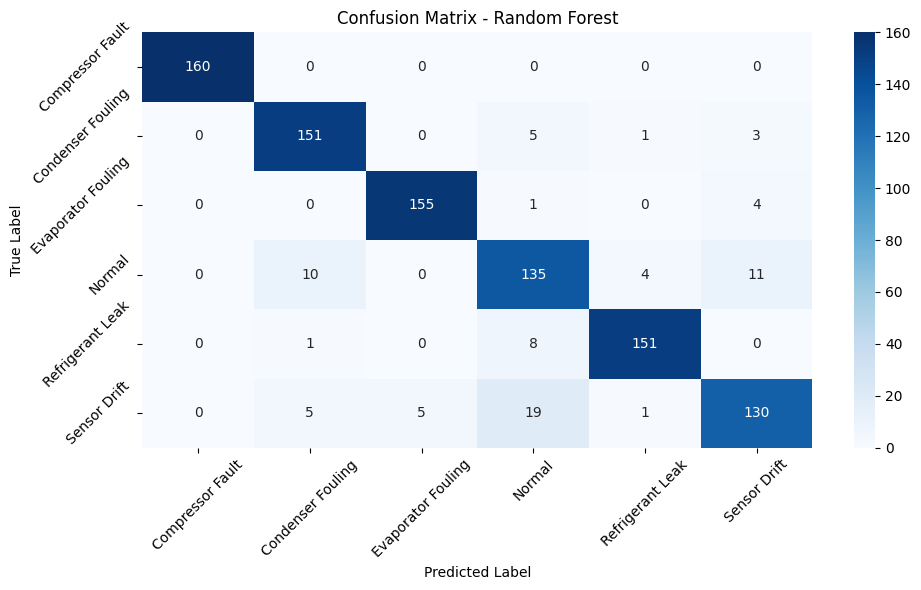

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()
